<font size=3 face="Arial">The SIR model has three groups, <b>S</b>usceptible, <b>I</b>nfected, and <b>R</b>emoved. </font> 

<font size=3 face="Arial">The functions of SIR model:</font> 
$$ dStdt= -βItStN $$
$$ dItdt=βItStN-γI(t) $$
$$ dRtdt=γI(t) $$
$$ S(t) + I(t) + R(t) = N$$

<font size=3 face="Arial">β: the infected rate </font>    
<font size=3 face="Arial">γ: the removal rate </font>   
<font size=3 face="Arial">t: the time state </font>     
<font size=3 face="Arial">S(t): the number of susceptible people </font>   
<font size=3 face="Arial">I(t): the number of infected people</font>   
<font size=3 face="Arial">R(t): the number of removed people</font>   
<font size=3 face="Arial">N: the population (the sum of S(t),I(t) and R(t)). </font>

<font size=3 face="Arial">  We program the change progress of each groups under discrete time stochastic SIR model. The following is the function of the model and the settings of the parameters.</font>   
<font size=3 face="Arial">The beta and gamma are the infected rate and the removal rate, we set the time range as [0,100] and the time interval is 0.1. </font>

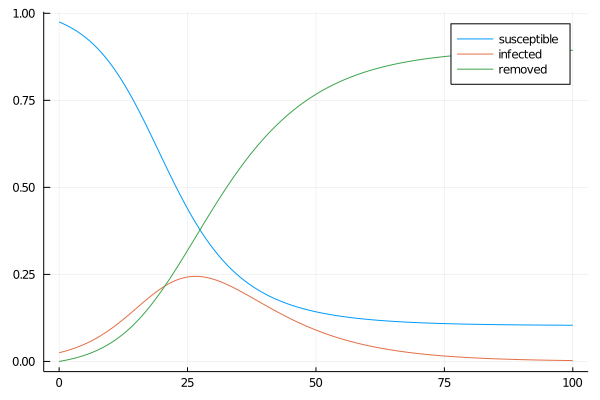

In [1]:
using DifferentialEquations,Plots

function SIR(X)
    S = X[1]
    I = X[2]
    R = X[3]
    newS = S - beta*S*I*dt
    newI = I + (beta*S*I - gamma*I)*dt
    newR = R + gamma * I * dt
    return [newS newI newR]
end

beta, gamma = 0.25, 0.1
initialInfect = 0.025
tEnd = 100.0
dt = 0.1

nsteps = round(Int64, tEnd/dt)
X = Array{Float64}(undef, nsteps+1, 3)
time = Array{Float64}(undef,nsteps+1)

initX = [1-initialInfect, initialInfect, 0.0]
X[1,:] = initX
time[1] = 0

for step = 1:nsteps
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

plot(time,X, label = ["susceptible" "infected" "removed"])

R0 = 2.5
Final infected proportion= 0.8928812377994341


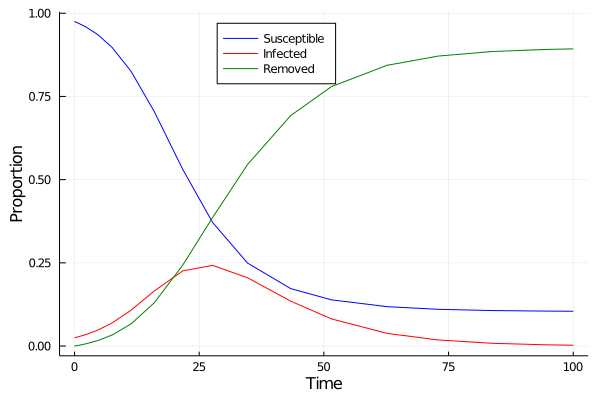

In [2]:
beta, gamma = 0.25, 0.1
initialInfect = 0.025
println("R0 = ", beta/gamma)

initX = [1-initialInfect,initialInfect, 0.0]
tEnd = 100.0

RHS(x,parms,t) = [ -beta*x[1]*x[2],
-gamma*x[2] + beta*x[1]*x[2],
gamma*x[2] ]

prob = ODEProblem(RHS, initX, (0,tEnd), 0)
sol = solve(prob)
println("Final infected proportion= ", sol.u[end][3])
plot(sol.t,((x)->x[1]).(sol.u),label = "Susceptible", c=:blue)
plot!(sol.t,((x)->x[2]).(sol.u),label = "Infected", c=:red)
plot!(sol.t,((x)->x[3]).(sol.u),label = "Removed", c=:green, xlabel = "Time", ylabel = "Proportion",legend = :top)

<font size=5 face="Arial">Integrate social distancing in the original model.</font> 

<font size=3 face="Arial">The number of invitations $c$ per individual as a random variable instead of a ﬁxed number and make the mean number of invitations time-dependent. Speciﬁcally, at time $t$ individual $x$ invites $c_{t,x}$ randomly chosen people to meet, where $c_{t,x}$ is an independent random variable having a (truncated) Poisson distribution with mean $m_t$. This means that the total number of meetings at day $t$ is given by $\sum_{x=1}^N c_{t,x} ≈ Nm_t$. </font>   

<font size=3 face="Arial">The $\beta$ in SIR model is replaced by $\beta_t = pm_t$, where the infection parameter $p$ is given as a model parameter. </font>  

|Time Range (in days) |mt |
|---|---|
|1–7 |5 |
|8–14 |4 |
|15–126 |3 |
|127–210 |4 |
|211–217 |5 |
|217–366 |6 |

<font size=4 face="Arial">The model parameters: </font>    

<font size=4 face="Arial">Time consists of 366 days representing the year 2020.(tEnd = 366). The population size $N = 10^4$. The infection probability of the biological virus is $p = 0.04$, while the corresponding removal probability $\gamma = 0.1$. There are 0.01 of infected individuals in the relevant (sub)population, while the others are susceptible. The number of invitations at day $t$ for individual $x$ follows a (truncated) Poisson distribution with mean parameter $m_t$. </font>   

<font size=4 face="Arial">We use the values for $m_t$ as the table above to incorporate timevarying social distancing measures. </font>

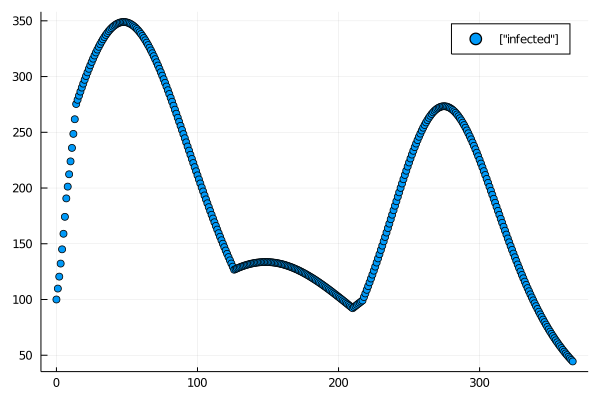

In [14]:
using DifferentialEquations,Plots

function SIR(X)
    S = X[1]
    I = X[2]
    R = X[3]
    N = X[4]
    newS = S - beta*S*I*dt/N
    newI = I + (beta*S*I/N - gamma*I)*dt
    newR = R + gamma * I * dt
    return [newS newI newR Population]
end

p, gamma = 0.04, 0.1
Population = 10000
initialInfect = 0.01 * Population
tEnd = 366
dt = 1

nsteps = round(Int64, tEnd/dt)
X = Array{Float64}(undef, nsteps+1, 4)
time = Array{Float64}(undef,nsteps+1)

initX = [Population-initialInfect, initialInfect, 0, Population]
X[1,:] = initX
time[1] = 0

for step = 1:7
    beta = p*5
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 8:14
    beta = p*4
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 15:126
    beta = p*3
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 127:210
    beta = p*4
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 211:217
    beta = p*5
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 218:nsteps
    beta = p*6
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

scatter(time,X[:,2], label = ["infected"])

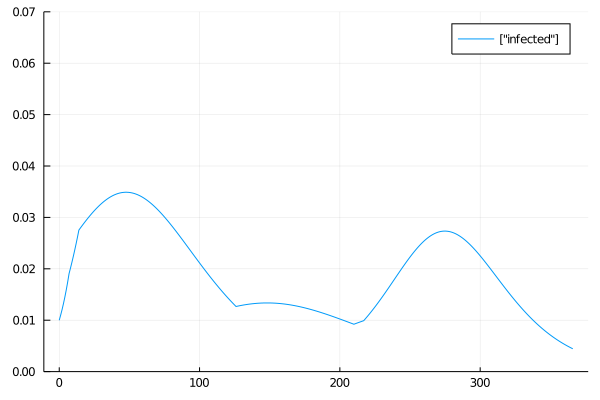

In [20]:
using DifferentialEquations,Plots

function SIR(X)
    S = X[1]
    I = X[2]
    R = X[3]
    newS = S - beta*S*I*dt
    newI = I + (beta*S*I - gamma*I)*dt
    newR = R + gamma * I * dt
    return [newS newI newR]
end

p, gamma = 0.04, 0.1
initialInfect = 0.01
tEnd = 366
dt = 1

nsteps = round(Int64, tEnd/dt)
X = Array{Float64}(undef, nsteps+1, 3)
time = Array{Float64}(undef,nsteps+1)

initX = [1-initialInfect, initialInfect, 0.0]
X[1,:] = initX
time[1] = 0

for step = 1:7
    beta = p*5
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 8:14
    beta = p*4
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 15:126
    beta = p*3
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 127:210
    beta = p*4
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 211:217
    beta = p*5
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

for step = 218:nsteps
    beta = p*6
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

plot(time,X[:,2], label = ["infected"],ylims = (0, 0.07))